In [1]:
import uproot 
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools/")
from analysisTools import loadSchema

# isoTrack pT cut down to 1 GeV; (m,dm) = (50,5), ctau=1+10+100+1000

In [24]:
file="/uscms_data/d3/sbrightt/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/AODSkimmer/Mchi-52p5_dMchi-5p0_ctau-all.root"
t = loadSchema(file)

t = t[(t.GenEle.pt>5)&(np.abs(t.GenEle.eta)<2.4)&(np.abs(t.GenEle.vxy<100))]

In [25]:
tkMatch_thresh = 0.05

match_e = t.GenEleClosest.dr < 0.1
#cut_tkmatch = (t.nGenEleTrkMatches>0)&(t.genEleNearTk.dRgen<tkMatch_thresh)&(np.abs(t.genEleNearTk.pt-t.GenEle.pt)/t.GenEle.pt<0.01)
cut_tkmatch = (t.nGenEleTrkMatches>0)&(t.genEleNearTk.dRgen<tkMatch_thresh)
tkmatch_e = (t.GenEleClosest.dr > 0.1) & (cut_tkmatch)
nomatch_e = (t.GenEleClosest.dr > 0.1) & (~cut_tkmatch)
tm = t[match_e]
ttk = t[tkmatch_e]
tno = t[nomatch_e]
tm_eles = ak.concatenate((tm.Electron,tm.LptElectron),axis=1)[ak.from_regular((ak.values_astype(tm.GenEleClosest.typ==2,"int")*ak.count(tm.Electron.pt,axis=1)+\
                                                                  tm.GenEleClosest.ind)[:,np.newaxis])][:,0]

"""ce = t.GenEleClosest.dr > 0.1
te = t[ce]
tne = t[~ce]
cp = t.GenPosClosest.dr > 0.1
tp = t[cp]
tnp = t[~cp]

cem = (t.GenEleClosest.dr > 0.1)&(t.nGenEleTrkMatches>0)&(t.genEleNearTk.dRgen<tkMatch_thresh)
tem = t[cem]
cenm = (t.GenEleClosest.dr>0.1)&((t.nGenEleTrkMatches==0) | ((t.nGenEleTrkMatches>0)&(t.genEleNearTk.dRgen>=tkMatch_thresh)))
tenm = t[cenm]

cpm = (t.GenPosClosest.dr>0.1)&(t.nGenPosTrkMatches>0)&(t.genPosNearTk.dRgen<tkMatch_thresh)
tpm = t[cpm]
cpnm = (t.GenPosClosest.dr>0.1)&((t.nGenPosTrkMatches==0) | ((t.nGenPosTrkMatches>0)&(t.genPosNearTk.dRgen>=tkMatch_thresh)))
tpnm = t[cpnm]

tne_match = ak.concatenate((tne.Electron,tne.LptElectron),axis=1)[ak.from_regular((ak.values_astype(tne.GenEleClosest.typ==2,"int")*ak.count(tne.Electron.pt,axis=1)+\
                                                                  tne.GenEleClosest.ind)[:,np.newaxis])][:,0]
tnp_match = ak.concatenate((tnp.Electron,tnp.LptElectron),axis=1)[ak.from_regular((ak.values_astype(tnp.GenPosClosest.typ==2,"int")*ak.count(tnp.Electron.pt,axis=1)+\
                                                                  tnp.GenPosClosest.ind)[:,np.newaxis])][:,0]"""

'ce = t.GenEleClosest.dr > 0.1\nte = t[ce]\ntne = t[~ce]\ncp = t.GenPosClosest.dr > 0.1\ntp = t[cp]\ntnp = t[~cp]\n\ncem = (t.GenEleClosest.dr > 0.1)&(t.nGenEleTrkMatches>0)&(t.genEleNearTk.dRgen<tkMatch_thresh)\ntem = t[cem]\ncenm = (t.GenEleClosest.dr>0.1)&((t.nGenEleTrkMatches==0) | ((t.nGenEleTrkMatches>0)&(t.genEleNearTk.dRgen>=tkMatch_thresh)))\ntenm = t[cenm]\n\ncpm = (t.GenPosClosest.dr>0.1)&(t.nGenPosTrkMatches>0)&(t.genPosNearTk.dRgen<tkMatch_thresh)\ntpm = t[cpm]\ncpnm = (t.GenPosClosest.dr>0.1)&((t.nGenPosTrkMatches==0) | ((t.nGenPosTrkMatches>0)&(t.genPosNearTk.dRgen>=tkMatch_thresh)))\ntpnm = t[cpnm]\n\ntne_match = ak.concatenate((tne.Electron,tne.LptElectron),axis=1)[ak.from_regular((ak.values_astype(tne.GenEleClosest.typ==2,"int")*ak.count(tne.Electron.pt,axis=1)+                                                                  tne.GenEleClosest.ind)[:,np.newaxis])][:,0]\ntnp_match = ak.concatenate((tnp.Electron,tnp.LptElectron),axis=1)[ak.from_regular((ak.values_astype

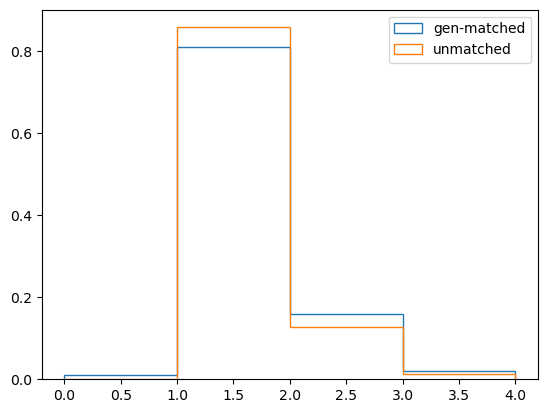

In [4]:
h1 = plt.hist(tm.nGenEleTrkMatches,bins=np.arange(0,5),density=True,histtype='step',label='gen-matched')
h1 = plt.hist(ttk.nGenEleTrkMatches,bins=np.arange(0,5),density=True,histtype='step',label='unmatched')
plt.legend()

Text(0.5, 0, 'Num Pix Hits')

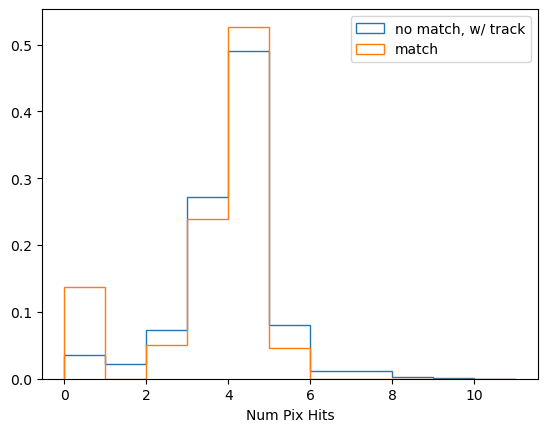

In [5]:
h1 = plt.hist(ttk.genEleNearTk.numPixHits,bins=np.arange(0,12),density=True,histtype='step',label='no match, w/ track')
h1 = plt.hist(tm_eles.numPixHits,bins=np.arange(0,12),density=True,histtype='step',label='match')
plt.legend(loc='upper right')
plt.xlabel("Num Pix Hits")

Text(0.5, 0, 'Num Strip Hits')

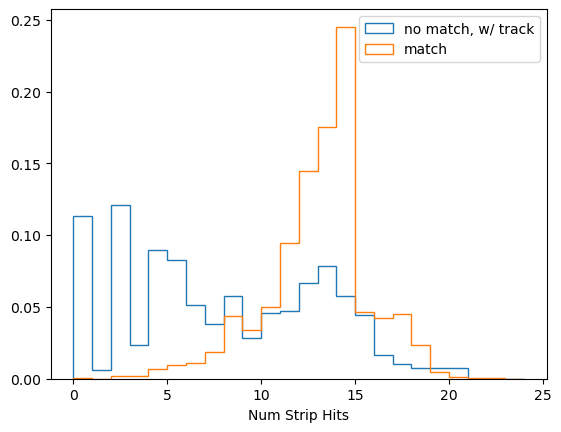

In [6]:
h1 = plt.hist(ttk.genEleNearTk.numStripHits,bins=np.arange(0,25),density=True,histtype='step',label='no match, w/ track')
h1 = plt.hist(tm_eles.numStripHits,bins=np.arange(0,25),density=True,histtype='step',label='match')
plt.legend(loc='upper right')
plt.xlabel("Num Strip Hits")

Text(0.5, 0, '$N_{pix} + N_{strip}$')

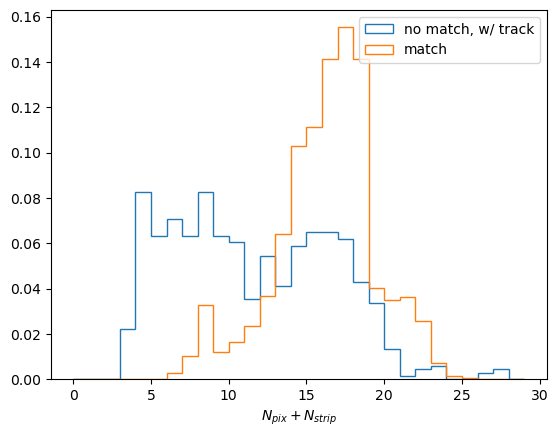

In [7]:
h1 = plt.hist(ttk.genEleNearTk.numStripHits+ttk.genEleNearTk.numPixHits,bins=np.arange(0,30),density=True,histtype='step',label='no match, w/ track')
h1 = plt.hist(tm_eles.numStripHits+tm_eles.numPixHits,bins=np.arange(0,30),density=True,histtype='step',label='match')
plt.legend(loc='upper right')
plt.xlabel(r"$N_{pix} + N_{strip}$")

Text(0, 0.5, '$N_{pix}$')

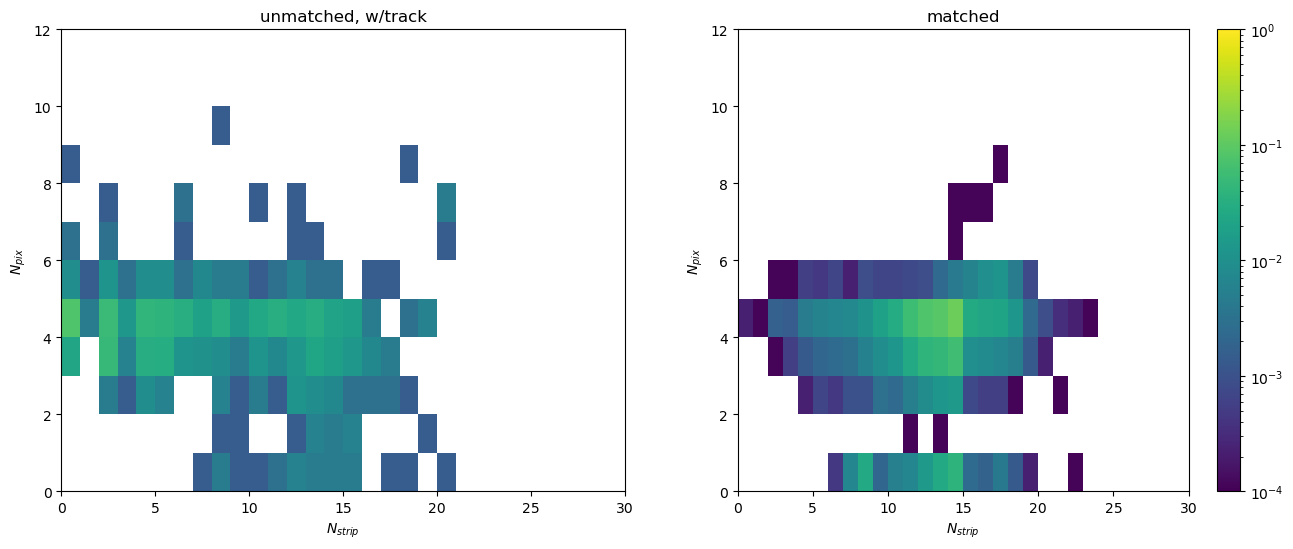

In [8]:
from matplotlib.colors import Normalize, LogNorm
plt.figure(figsize=(16,6))
norm = LogNorm(vmin=1e-4,vmax=1)
plt.subplot(121)
plt.hist2d(ttk.genEleNearTk.numStripHits,ttk.genEleNearTk.numPixHits,bins=(np.arange(0,31),np.arange(0,13)),norm=norm,density=True)
plt.xlabel(r"$N_{strip}$")
plt.ylabel(r"$N_{pix}$")
plt.title("unmatched, w/track")
plt.subplot(122)
plt.hist2d(tm_eles.numStripHits,tm_eles.numPixHits,bins=(np.arange(0,31),np.arange(0,13)),norm=norm,density=True)
plt.title("matched")
plt.colorbar()
plt.xlabel(r"$N_{strip}$")
plt.ylabel(r"$N_{pix}$")

Text(0, 0.5, '$N_{pix} + N_{strip}$')

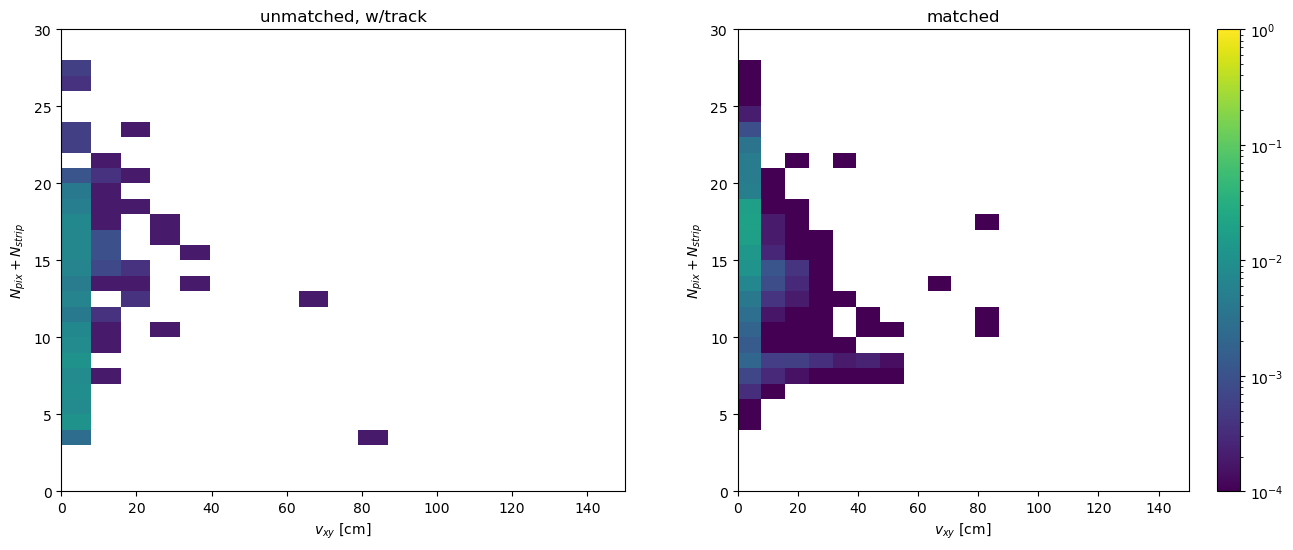

In [9]:
from matplotlib.colors import Normalize, LogNorm
plt.figure(figsize=(16,6))
norm = LogNorm(vmin=1e-4,vmax=1)
plt.subplot(121)
plt.hist2d(ttk.GenEle.vxy,ttk.genEleNearTk.numStripHits+ttk.genEleNearTk.numPixHits,bins=(np.linspace(0,150,20),np.arange(0,31)),norm=norm,density=True)
plt.title("unmatched, w/track")
plt.xlabel(r"$v_{xy}$ [cm]")
plt.ylabel(r"$N_{pix} + N_{strip}$")
plt.subplot(122)
plt.hist2d(tm.GenEle.vxy,tm_eles.numStripHits+tm_eles.numPixHits,bins=(np.linspace(0,150,20),np.arange(0,31)),norm=norm,density=True)
plt.title("matched")
plt.colorbar()
plt.xlabel(r"$v_{xy}$ [cm]")
plt.ylabel(r"$N_{pix} + N_{strip}$")

Text(0, 0.5, '$N_{pix}$')

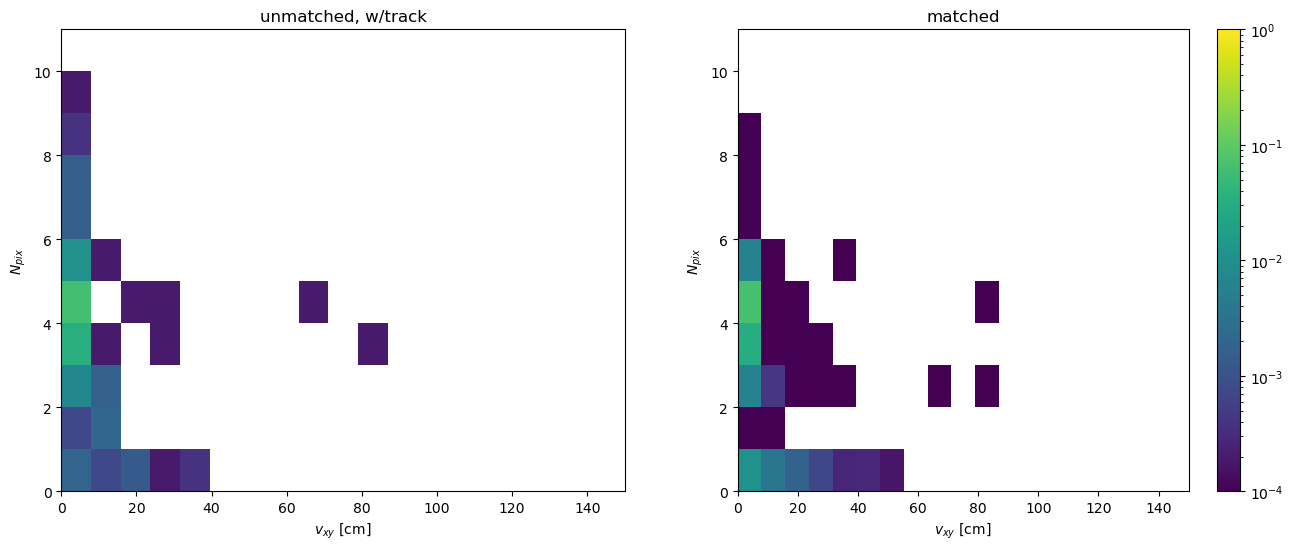

In [10]:
from matplotlib.colors import Normalize, LogNorm
plt.figure(figsize=(16,6))
norm = LogNorm(vmin=1e-4,vmax=1)
plt.subplot(121)
plt.hist2d(ttk.GenEle.vxy,ttk.genEleNearTk.numPixHits,bins=(np.linspace(0,150,20),np.arange(0,12)),norm=norm,density=True)
plt.title("unmatched, w/track")
plt.xlabel(r"$v_{xy}$ [cm]")
plt.ylabel(r"$N_{pix}$")
plt.subplot(122)
plt.hist2d(tm.GenEle.vxy,tm_eles.numPixHits,bins=(np.linspace(0,150,20),np.arange(0,12)),norm=norm,density=True)
plt.title("matched")
plt.colorbar()
plt.xlabel(r"$v_{xy}$ [cm]")
plt.ylabel(r"$N_{pix}$")

Text(0, 0.5, '$N_{strip}$')

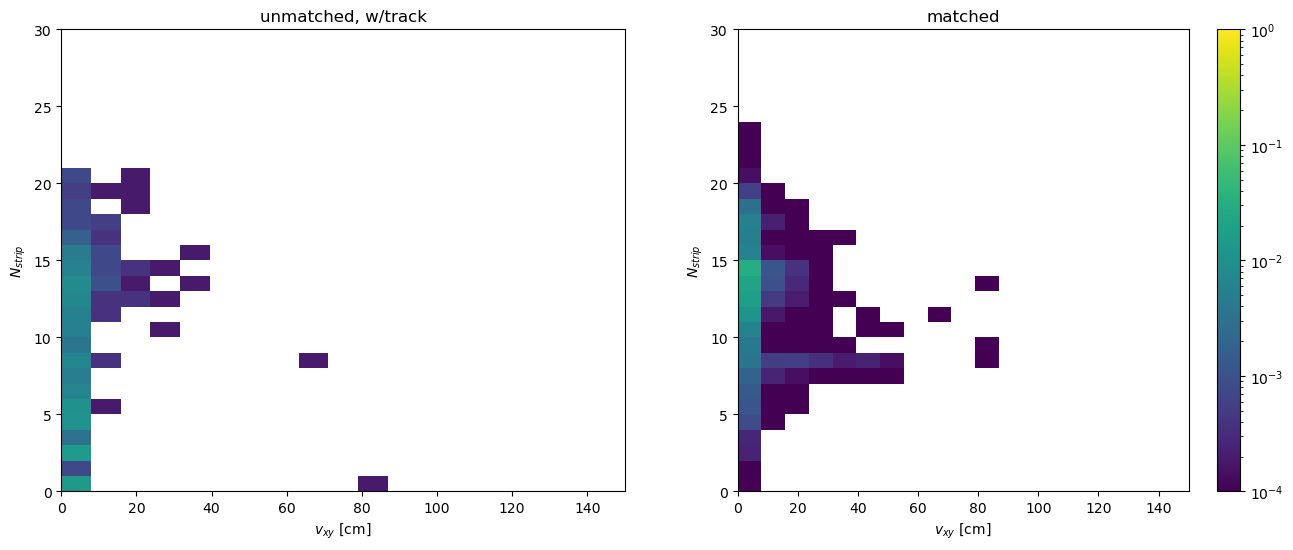

In [11]:
from matplotlib.colors import Normalize, LogNorm
plt.figure(figsize=(16,6))
norm = LogNorm(vmin=1e-4,vmax=1)
plt.subplot(121)
plt.hist2d(ttk.GenEle.vxy,ttk.genEleNearTk.numStripHits,bins=(np.linspace(0,150,20),np.arange(0,31)),norm=norm,density=True)
plt.title("unmatched, w/track")
plt.xlabel(r"$v_{xy}$ [cm]")
plt.ylabel(r"$N_{strip}$")
plt.subplot(122)
plt.hist2d(tm.GenEle.vxy,tm_eles.numStripHits,bins=(np.linspace(0,150,20),np.arange(0,31)),norm=norm,density=True)
plt.title("matched")
plt.colorbar()
plt.xlabel(r"$v_{xy}$ [cm]")
plt.ylabel(r"$N_{strip}$")

Text(0, 0.5, '$N_{pix} + N_{strip}$')

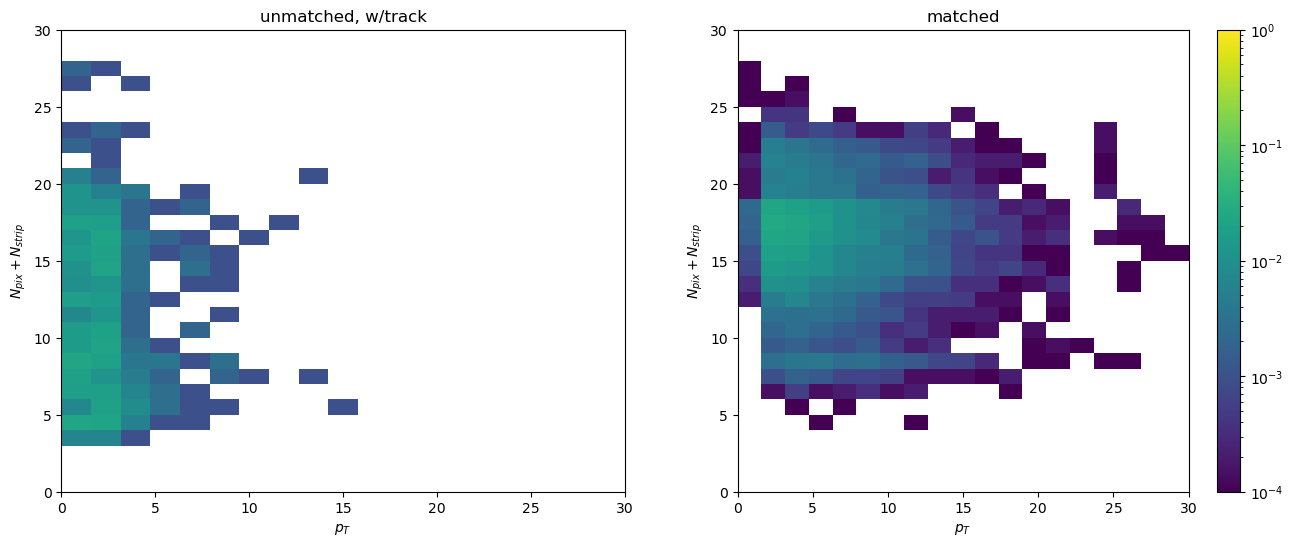

In [12]:
from matplotlib.colors import Normalize, LogNorm
plt.figure(figsize=(16,6))
norm = LogNorm(vmin=1e-4,vmax=1)
plt.subplot(121)
plt.hist2d(ttk.GenEle.pt,ttk.genEleNearTk.numStripHits+ttk.genEleNearTk.numPixHits,bins=(np.linspace(0,30,20),np.arange(0,31)),norm=norm,density=True)
plt.title("unmatched, w/track")
plt.xlabel(r"$p_T$")
plt.ylabel(r"$N_{pix} + N_{strip}$")
plt.subplot(122)
plt.hist2d(tm.GenEle.pt,tm_eles.numStripHits+tm_eles.numPixHits,bins=(np.linspace(0,30,20),np.arange(0,31)),norm=norm,density=True)
plt.title("matched")
plt.colorbar()
plt.xlabel(r"$p_T$")
plt.ylabel(r"$N_{pix} + N_{strip}$")

Text(0, 0.5, '$v_{xy}$ [cm]')

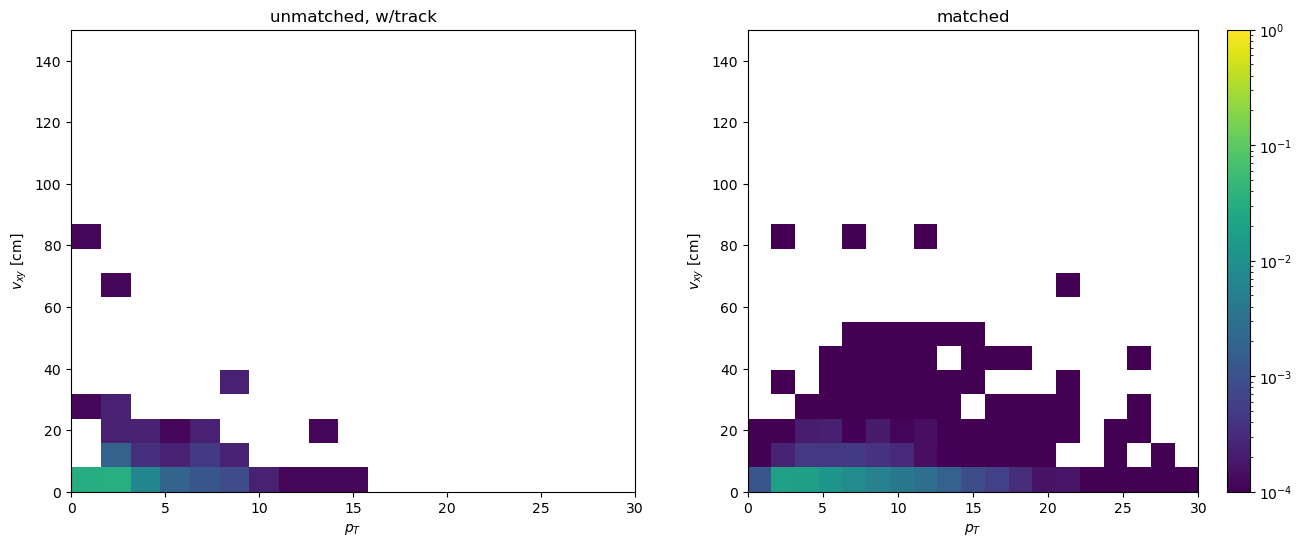

In [13]:
from matplotlib.colors import Normalize, LogNorm
plt.figure(figsize=(16,6))
norm = LogNorm(vmin=1e-4,vmax=1)
plt.subplot(121)
plt.hist2d(ttk.GenEle.pt,ttk.GenEle.vxy,bins=(np.linspace(0,30,20),np.linspace(0,150,20)),norm=norm,density=True)
plt.title("unmatched, w/track")
plt.xlabel(r"$p_T$")
plt.ylabel(r"$v_{xy}$ [cm]")
plt.subplot(122)
plt.hist2d(tm.GenEle.pt,tm.GenEle.vxy,bins=(np.linspace(0,30,20),np.linspace(0,150,20)),norm=norm,density=True)
plt.title("matched")
plt.colorbar()
plt.xlabel(r"$p_T$")
plt.ylabel(r"$v_{xy}$ [cm]")

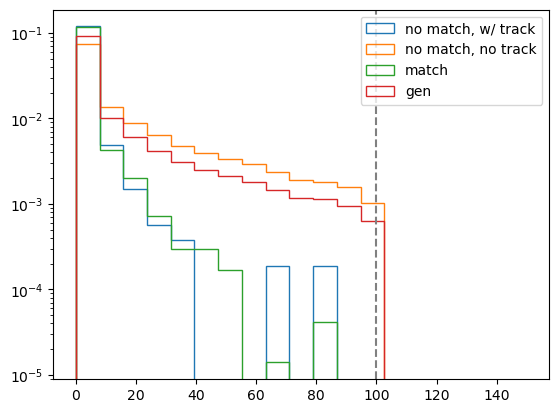

In [14]:
bins=np.linspace(0,150,20)
h1 = plt.hist(ttk.GenEle.vxy,bins=bins,density=True,histtype='step',label='no match, w/ track')
h1 = plt.hist(tno.GenEle.vxy,bins=bins,density=True,histtype='step',label='no match, no track')
h1 = plt.hist(tm.GenEle.vxy,bins=bins,density=True,histtype='step',label='match')
h1 = plt.hist(t.GenEle.vxy,bins=bins,density=True,histtype='step',label='gen')
plt.axvline(100,color='gray',linestyle='--')
plt.yscale('log')
plt.legend(loc='upper right')

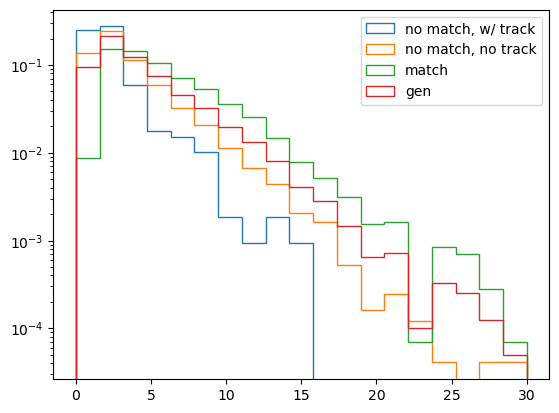

In [15]:
bins=np.linspace(0,30,20)
h1 = plt.hist(ttk.GenEle.pt,bins=bins,density=True,histtype='step',label='no match, w/ track')
h1 = plt.hist(tno.GenEle.pt,bins=bins,density=True,histtype='step',label='no match, no track')
h1 = plt.hist(tm.GenEle.pt,bins=bins,density=True,histtype='step',label='match')
h1 = plt.hist(t.GenEle.pt,bins=bins,density=True,histtype='step',label='gen')
plt.yscale('log')
plt.legend(loc='upper right')

# vxy-binned stuff

In [26]:
vxy_bins = np.arange(0,105,5)
vxy_centers = (vxy_bins[:-1]+vxy_bins[1:])/2

nm = []
ntk = []
nno = []

vm_pix = []
vm_strip = []
vtk_pix = []
vtk_strip = []
vno_pix = []
vno_strip = []
for i in range(len(vxy_bins)-1):
    v0,v1 = vxy_bins[i], vxy_bins[i+1]
    t0 = tm[(tm.GenEle.vxy>v0)&(tm.GenEle.vxy<v1)]
    t0e = tm_eles[(tm.GenEle.vxy>v0)&(tm.GenEle.vxy<v1)]
    t1 = ttk[(ttk.GenEle.vxy>v0)&(ttk.GenEle.vxy<v1)]
    t2 = tno[(tno.GenEle.vxy>v0)&(tno.GenEle.vxy<v1)]
    
    nm.append(len(t0))
    ntk.append(len(t1))
    nno.append(len(t2))
    
    vm_pix.append(np.average(t0e.numPixHits))
    vm_strip.append(np.average(t0e.numStripHits))
    vtk_pix.append(np.average(t1.genEleNearTk.numPixHits))
    vtk_strip.append(np.average(t1.genEleNearTk.numStripHits))
    
vm_pix = np.array(vm_pix)
vm_strip = np.array(vm_strip)
vtk_pix = np.array(vtk_pix)
vtk_strip = np.array(vtk_strip)
vno_pix = np.array(vno_pix)
vno_strip = np.array(vno_strip)

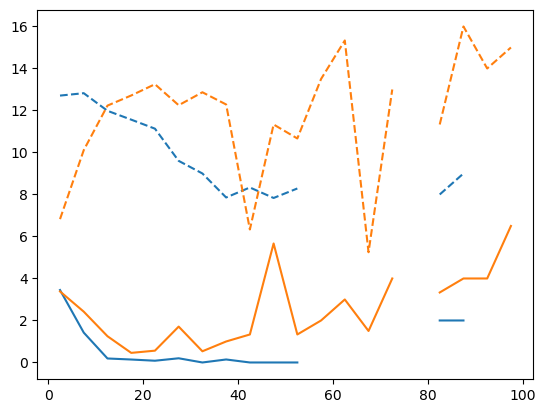

In [27]:
plt.plot(vxy_centers,vm_pix,color='C0')
plt.plot(vxy_centers,vm_strip,color='C0',linestyle='--')
plt.plot(vxy_centers,vtk_pix,color='C1')
plt.plot(vxy_centers,vtk_strip,color='C1',linestyle='--')

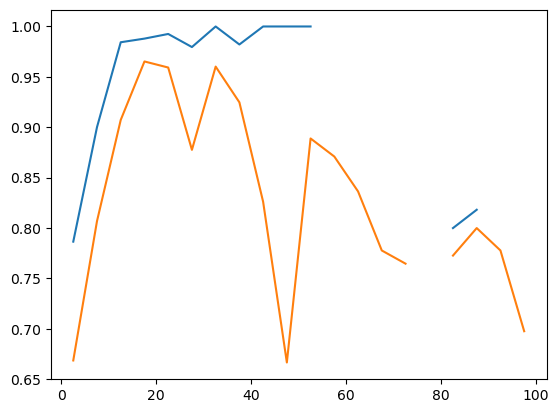

In [28]:
plt.plot(vxy_centers,vm_strip/(vm_pix+vm_strip),color='C0')
plt.plot(vxy_centers,vtk_strip/(vtk_pix+vtk_strip),color='C1')

(array([  7.,   8.,  79., 388., 174.,  27.,   4.,   0.,   0.,   1.]),
 array([-0.06787252, -0.04877572, -0.02967892, -0.01058211,  0.00851469,
         0.02761149,  0.0467083 ,  0.0658051 ,  0.08490191,  0.10399871,
         0.12309551], dtype=float32),
 <BarContainer object of 10 artists>)

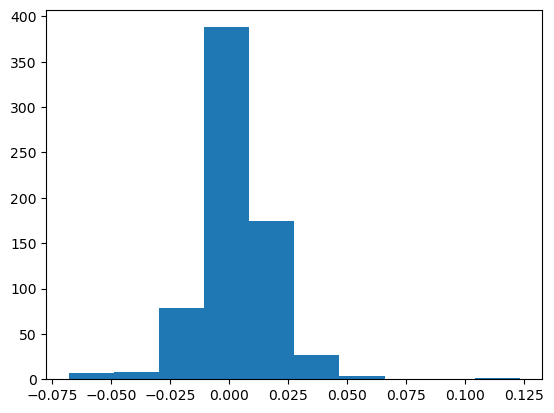

In [141]:
plt.hist(ttk.GenEle.pt-ttk.genEleNearTk.pt)

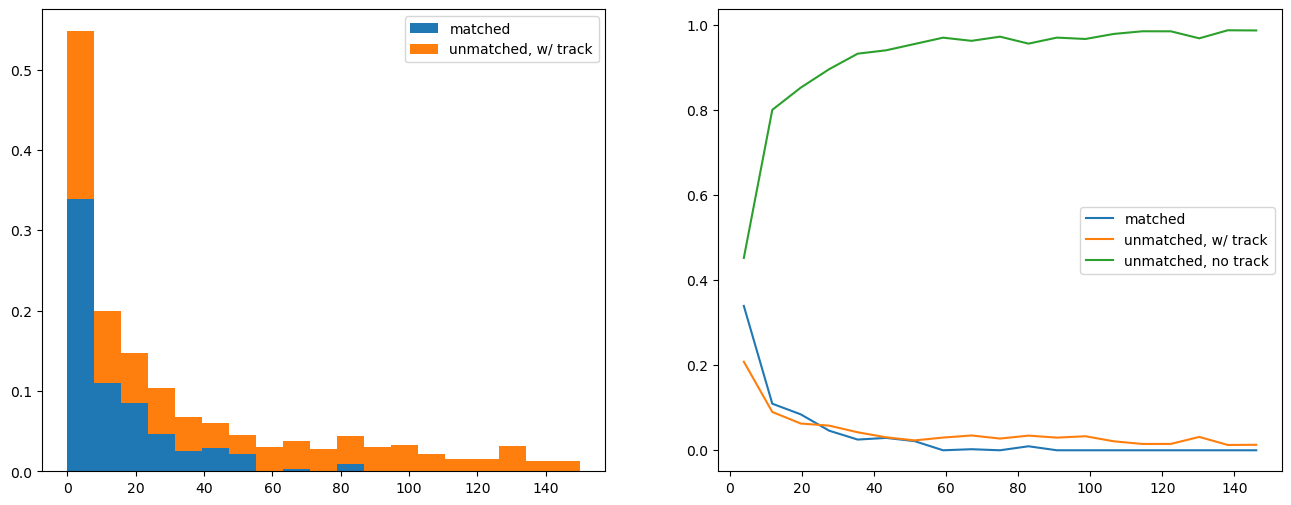

In [137]:
bins = np.linspace(0,150,20)
centers = (bins[1:]+bins[:-1])/2
plt.figure(figsize=(16,6))
plt.subplot(121)
w = bins[1]-bins[0]
edges = bins[:-1]
nne,bins = np.histogram(tne.GenEle.vxy,bins=bins)
nem,bins = np.histogram(tem.GenEle.vxy,bins=bins)
nenm,bins = np.histogram(tenm.GenEle.vxy,bins=bins)
ntot,bins = np.histogram(t.GenEle.vxy,bins=bins)
bottom = np.zeros(len(edges))
plt.bar(edges,nne/ntot,align='edge',width=w,bottom=bottom,label='matched')
bottom+=nne/ntot
plt.bar(edges,nem/ntot,align='edge',width=w,bottom=bottom,label='unmatched, w/ track')
bottom+=nem/ntot
#plt.bar(edges,nenm/ntot,align='edge',width=w,bottom=bottom,label='unmatched, no track')
plt.legend()

plt.subplot(122)
plt.plot(centers,nne/ntot,label='matched')
plt.plot(centers,nem/ntot,label='unmatched, w/ track')
plt.plot(centers,nenm/ntot,label='unmatched, no track')
plt.legend()

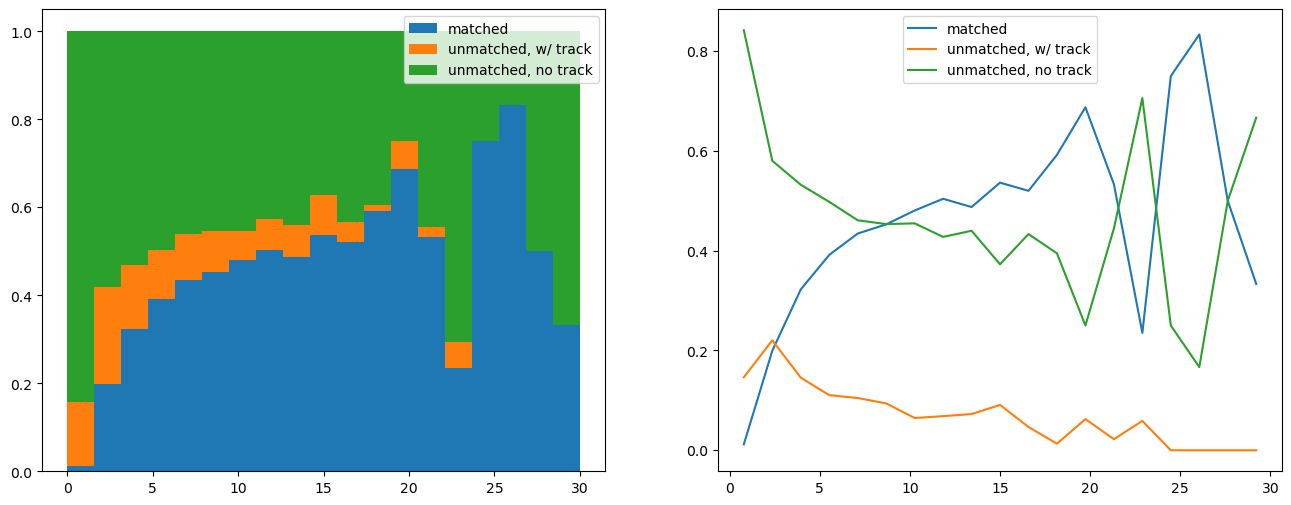

In [138]:
bins = np.linspace(0,30,20)
centers = (bins[1:]+bins[:-1])/2
plt.figure(figsize=(16,6))
plt.subplot(121)
w = bins[1]-bins[0]
edges = bins[:-1]
nne,bins = np.histogram(tne.GenEle.pt,bins=bins)
nem,bins = np.histogram(tem.GenEle.pt,bins=bins)
nenm,bins = np.histogram(tenm.GenEle.pt,bins=bins)
ntot,bins = np.histogram(t.GenEle.pt,bins=bins)
bottom = np.zeros(len(edges))
plt.bar(edges,nne/ntot,align='edge',width=w,bottom=bottom,label='matched')
bottom+=nne/ntot
plt.bar(edges,nem/ntot,align='edge',width=w,bottom=bottom,label='unmatched, w/ track')
bottom+=nem/ntot
plt.bar(edges,nenm/ntot,align='edge',width=w,bottom=bottom,label='unmatched, no track')
plt.legend()

plt.subplot(122)
plt.plot(centers,nne/ntot,label='matched')
plt.plot(centers,nem/ntot,label='unmatched, w/ track')
plt.plot(centers,nenm/ntot,label='unmatched, no track')
plt.legend()

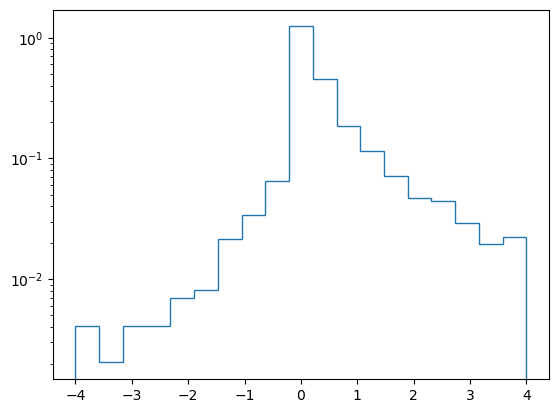

In [139]:
bins = np.linspace(-4,4,20)
h1 = plt.hist(tem.GenEle.pt-tem.genEleNearTk.pt,bins=bins,histtype='step',density=True)
plt.yscale('log')